### IMPORTING IMPORTANT LIBRARIES

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### IMPORTING DATASET

In [6]:
df = pd.read_csv("advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


*Aim:- Sales prediction involves forecasting the amount of a product that
customers will purchase, taking into account various factors such as
advertising expenditure, target audience segmentation, and
advertising platform selection.*

In [5]:
df.shape

(200, 4)

### Summary Statistics with describe()

In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


### Pairplot of Advertising Media vs. Sales

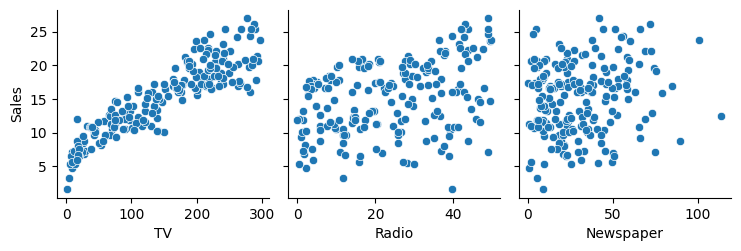

In [8]:
sns.pairplot(df, x_vars=['TV', 'Radio','Newspaper'], y_vars='Sales', kind='scatter')
plt.show()

### Histogram of TV Advertising Spend

<Axes: ylabel='Frequency'>

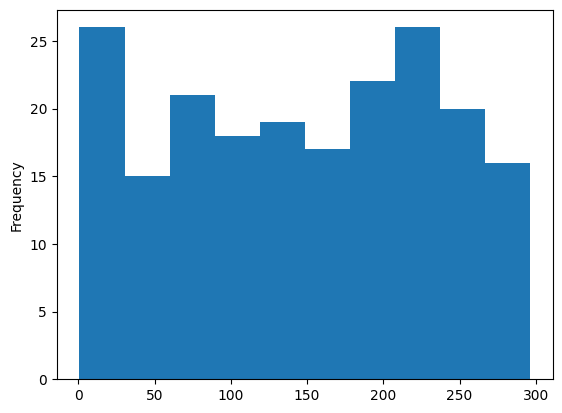

In [15]:
df['TV'].plot.hist(bins=10)

### Histogram of Radio Advertising Spend

<Axes: ylabel='Frequency'>

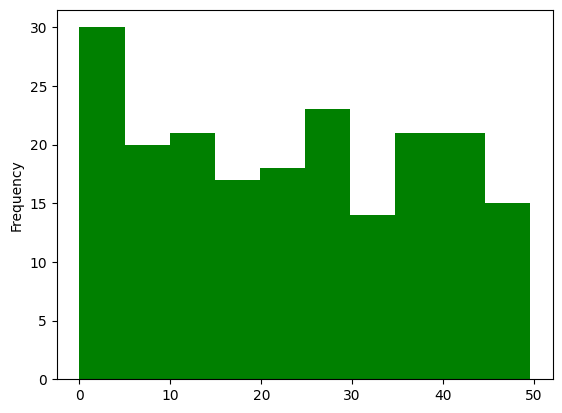

In [23]:
df['Radio'].plot.hist(bins=10, color="green", xlabel="Radio")

### Histogram of Newspaper Advertising Spend

<Axes: ylabel='Frequency'>

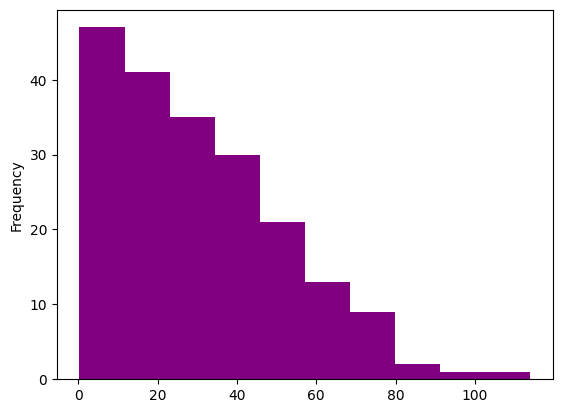

In [24]:
df['Newspaper'].plot.hist(bins=10,color="purple", xlabel="newspaper")

### Correlation Heatmap

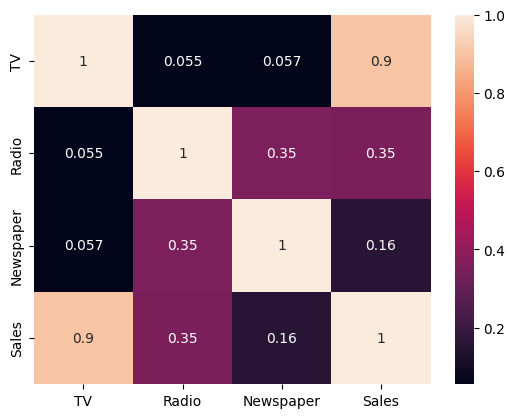

In [15]:
sns.heatmap(df.corr(),annot = True)
plt.show()

**This visualization helps in understanding the relationships and dependencies between different features and the target variable,**
**which can inform feature selection and model development.**

## Pairplot of Advertising Media vs. Sales with Regression Lines

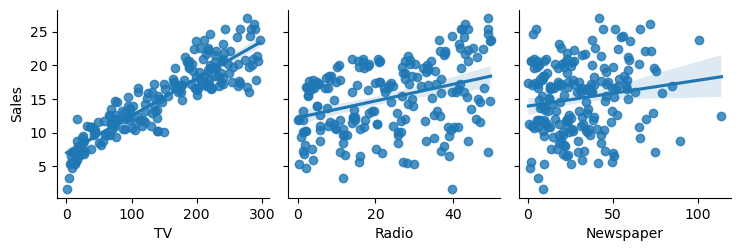

In [84]:
sns.pairplot(df, x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales", kind="reg")

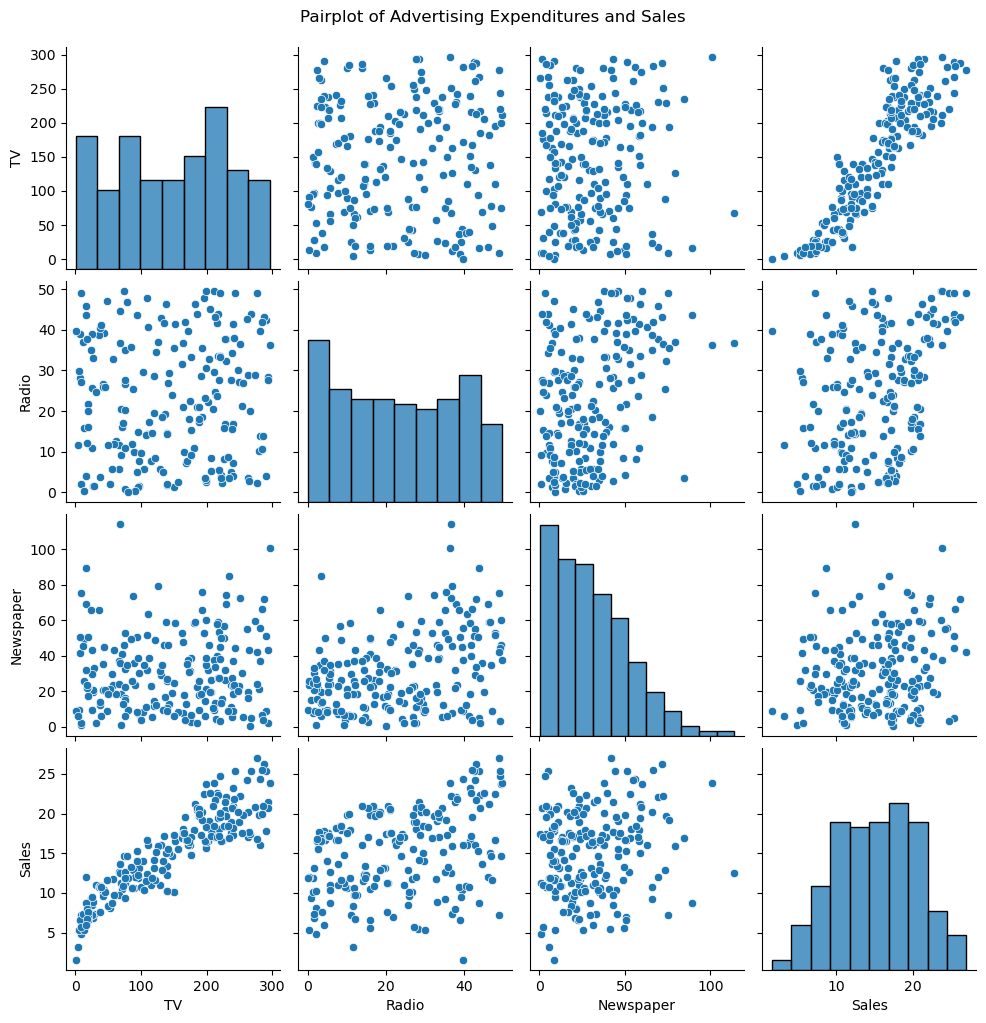

In [128]:
sns.pairplot(df)
plt.suptitle('Pairplot of Advertising Expenditures and Sales', y=1.02)
plt.show()

## Preparing Features and Target Variable for Sales Prediction

In [54]:
x = df.drop("Sales", axis=1)
#Target Variabl
y = df["Sales"]

## Splitting Data into Training and Testing Sets for Sales Prediction

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
print(x)

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]


In [58]:
print(y)

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64


## Training a Linear Regression Model for Sales Prediction

In [98]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

## Making Predictions with the Trained Linear Regression Model

In [126]:
result= model.predict(X_test)
print(result)

[[17.0347724 ]
 [20.40974033]
 [23.72398873]
 [ 9.27278518]
 [21.68271879]
 [12.56940161]
 [21.08119452]
 [ 8.69035045]
 [17.23701254]
 [16.66657475]
 [ 8.92396497]
 [ 8.4817344 ]
 [18.2075123 ]
 [ 8.06750728]
 [12.64550975]
 [14.93162809]
 [ 8.12814594]
 [17.89876565]
 [11.00880637]
 [20.47832788]
 [20.80631846]
 [12.59883297]
 [10.9051829 ]
 [22.38854775]
 [ 9.41796094]
 [ 7.92506736]
 [20.83908497]
 [13.81520938]
 [10.77080925]
 [ 7.92682509]
 [15.95947357]
 [10.63490851]
 [20.80292008]
 [10.43434164]
 [21.5784752 ]
 [21.18364487]
 [12.12821771]
 [22.80953262]
 [12.60992766]
 [ 6.46441252]]


## Evaluating the Linear Regression Model: Error Metrics and R-Squared

In [134]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, res)
mse = mean_squared_error(y_test, res)
r2 = r2_score(y_test, res)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 1.274826210954934
Mean Squared Error (MSE): 2.907756910271091
R-squared (R²): 0.9059011844150826


## Predicting Sales for New Advertising Data

In [110]:
new_data = pd.DataFrame({'TV': [100], 'Radio': [50], 'Newspaper': [25]})
predicted_sales = model.predict(new_data)
print("Predicted Sales:", predicted_sales)

Predicted Sales: [[15.32073778]]


In [124]:
new_data = pd.DataFrame({'TV': [30], 'Radio': [80], 'Newspaper': [45]})
predicted_sales = model.predict(new_data)
print("Predicted Sales:", predicted_sales)

Predicted Sales: [[14.62018263]]
